In [3]:
import kwant
import matplotlib.pyplot as plt
import numpy as np
import dask.bag as db
from dask_quantumtinkerer import Cluster, cluster_options
import itertools as it
import pickle
import os
import sympy as sp

import ccode.finite_system as tj
import ccode.tools as tl

%matplotlib inline

/opt/conda/lib/python3.9/site-packages/dask_gateway/client.py:21: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import LoopRunner, format_bytes


In [4]:
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [5]:
a = 10e-9

# Cluster configuration

In [13]:
options = cluster_options()
options.worker_cores = 1  # you should always leave this to 1 (I think)
options.worker_memory = 2  # Need to atdjust this to meet your needs
options.extra_path = "/home/jtorresluna/work/trijunction_design/"  # Make sure to do this if you import any local modules!

In [14]:
cluster = Cluster(options)

In [15]:
cluster

In [16]:
print(
    "http://io.quantumtinkerer.tudelft.nl/user/jdtorres/proxy/"
    + cluster.dashboard_link[17:]
)

http://io.quantumtinkerer.tudelft.nl/user/jdtorres/proxy/8000/clusters/1464e90386704afaae7f07ddf5968bc4/status


In [17]:
client = cluster.get_client()

In [48]:
cluster.close()

# Geometrical dependence of MBS coupling
This notebook is used to produce the results of the geometrical dependence of the MBS coupling in different trijunction geometries. The geometries, and associated experiments, are listed here:
* Rectangular geometry
    * Distance between MBS dependence by changing length and width of rectangle.
    * Repeat with all wires at one side.
* Circular geometry
    * Dependence on total size of the system. MBS are fixed at symmetric positions while radius is increased.
* Half ring geometry
    * Constant width for the ring while radius increases.
* Triangular geometry  
    * Angle dependence with two and three wires placed at flat side.
    * Pick three angles with the largest couplings and increase system size.
    * Pick best angle/size configuration and plot wavefunctions.
* Inverted triangle geometry    
    * Angle dependence with two and three wires placed at diagonal side.
    * Pick three angles with the largest couplings and increase system size.
    * Pick best angle/size configuration and plot wavefunctions.

# Rectangular geometry

## Length dependence

In [6]:
geometry = {
    "l": 130*a,
    "w": 7*a,
    "a": a,
    "side": 'up',
    "shape": 'rectangle',
    "W": 30*a,
    "centers": [7*a, -7*a]
}

In [7]:
n_geometries = 10
lengths = np.linspace(10*a, 100*a, n_geometries)

In [8]:
tjs_length = []
for length in lengths:
    geometry.update(L=length)
    trijunction, f_params, _ = tj.finite_system(**geometry)
    trijunction = trijunction.finalized()
    tjs_length.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

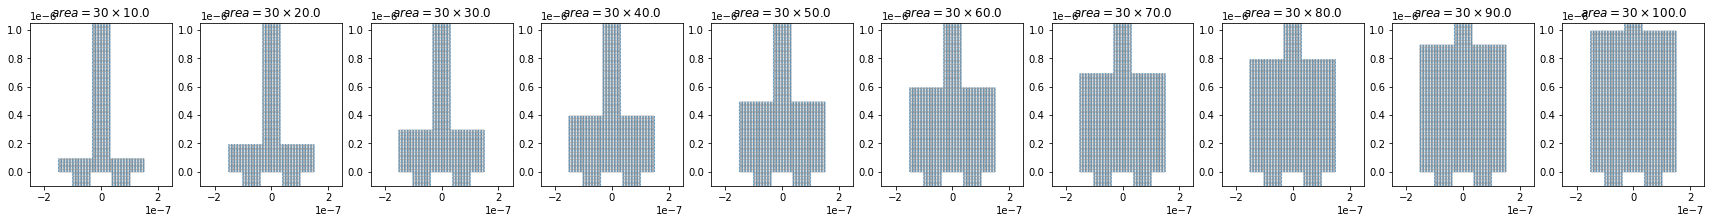

In [9]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs_length[i][0], ax=axes)
    axes.set_ylim(-1e-7, 10.5e-7)
    axes.set_title(r'$area=30\times$'+str(np.round(lengths[i]/a, 3)))
    axes.set_xlim(-2.5e-7, 2.5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

(-1e-07, 4e-07)

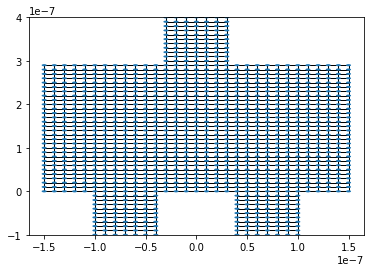

In [14]:
fig, ax = plt.subplots()
kwant.plot(tjs_length[2][0], ax=ax)
ax.set_ylim(-1e-7, 4e-7)

### Calculation: all bands

In [49]:
mus_qd = np.linspace(-0.002, 0.005, 150)
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs_length, n=n, key=key)

In [50]:
def wrap(args):
    return eigen(*args)

In [51]:
directory_path = '../data/rectangle_length'
os.system('mkdir ' + directory_path)

mkdir: cannot create directory ‘../data/rectangle_length’: File exists


256

In [52]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)

    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()

    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

## Width dependence

In [53]:
geometry = {
    "l": 130*a,
    "w": 7*a,
    "a": a,
    "side": 'up',
    "shape": 'rectangle',
    "L": 15*a
}

In [54]:
n_geometries = 10
widths = np.linspace(30*a, 130*a, n_geometries)

In [55]:
tjs_width = []
for width in widths:
    geometry.update(W=width)
    center = width/2 - 8*a
    geometry.update(centers=[center, -center])
    trijunction, f_params, _ = tj.finite_system(**geometry)
    trijunction = trijunction.finalized()
    tjs_width.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

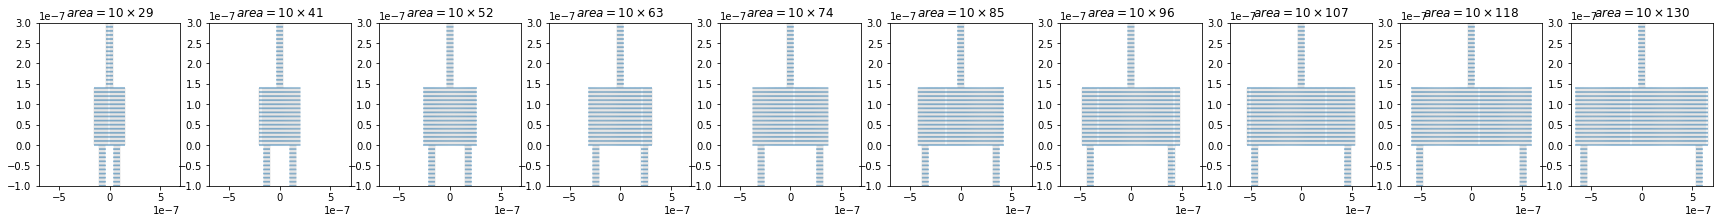

In [56]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs_width[i][0], ax=axes)
    axes.set_ylim(-1e-7, 3e-7)
    axes.set_title(r'$area=10\times$'+str(int(widths[i]/a)))
    axes.set_xlim(-7e-7, 7e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

### Calculation: all bands

In [57]:
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs_width, n=n, key=key)

In [58]:
def wrap(args):
    return eigen(*args)

In [59]:
directory_path = '../data/rectangle_width'
os.system('mkdir ' + directory_path)

mkdir: cannot create directory ‘../data/rectangle_width’: File exists


256

In [60]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)

    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()

    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

In [ ]:
eigen = tl.solver(geometries=tjs_width, n=n, key=key)

def wrap(args):
    return eigen(*args)

args = list(it.product(range(n_geometries), mus_qd, params))
args_db = db.from_sequence(args, npartitions=20)
result = args_db.map(wrap).compute()


def solver(geometries, n, key):

    def eigensystem_sla(geometry_index, mu, extra_params):

        params.update(extra_params)
        params[key] = mu
        system, params_func = geometries[geometry_index]
        ham_mat = system.hamiltonian_submatrix(sparse=True, params=params_func(**params))
        evals, evecs = sort_eigen(sla.eigsh(ham_mat.tocsc(), k=n, sigma=0))

        return evals, evecs

    return eigensystem_sla

## Width dependence with wires at the same side

In [61]:
geometry = {
    "l": 130*a,
    "w": 7*a,
    "a": a,
    "side": 'down',
    "shape": 'rectangle',
    "L": 15*a
}

In [62]:
n_geometries = 10
widths = np.linspace(50*a, 130*a, n_geometries)

In [63]:
tjs_width = []
for width in widths:
    geometry.update(W=width)
    center = width/2 - 8*a
    geometry.update(centers=[center, -center])
    trijunction, f_params, _ = tj.finite_system(**geometry)
    trijunction = trijunction.finalized()
    tjs_width.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

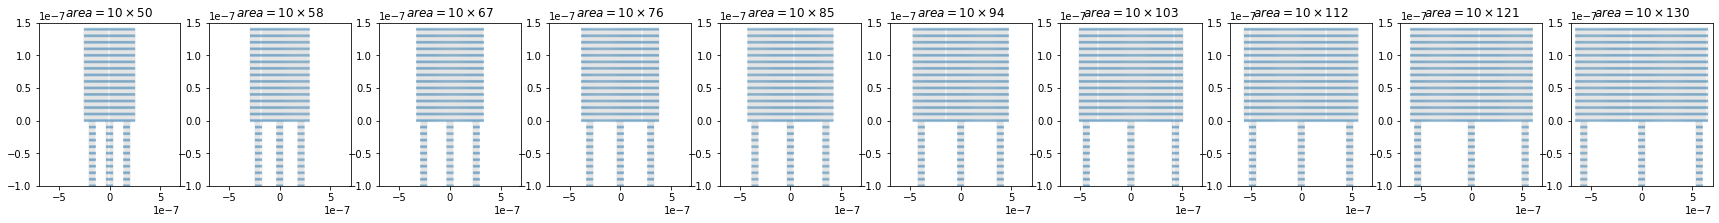

In [64]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs_width[i][0], ax=axes)
    axes.set_ylim(-1e-7, 1.5e-7)
    axes.set_title(r'$area=10\times$'+str(int(widths[i]/a)))
    axes.set_xlim(-7e-7, 7e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

### Calculation: all bands

In [65]:
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs_width, n=n, key=key)

In [66]:
def wrap(args):
    return eigen(*args)

In [67]:
directory_path = '../data/rectangle_width_one_side'
os.system('mkdir ' + directory_path)

0

In [68]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)

    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()

    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

# Circular geometry

## Radius dependence

In [15]:
geometry = {
    "L": 130*a,
    "w": 7*a
}

In [16]:
n_geometries = 10
Rs = np.linspace(12*a, 38*a, n_geometries)

In [17]:
tjs_circle = []
for R in Rs:
    geometry.update(R=R)
    trijunction, f_params = tj.circular_junction(**geometry)
    tjs_circle.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

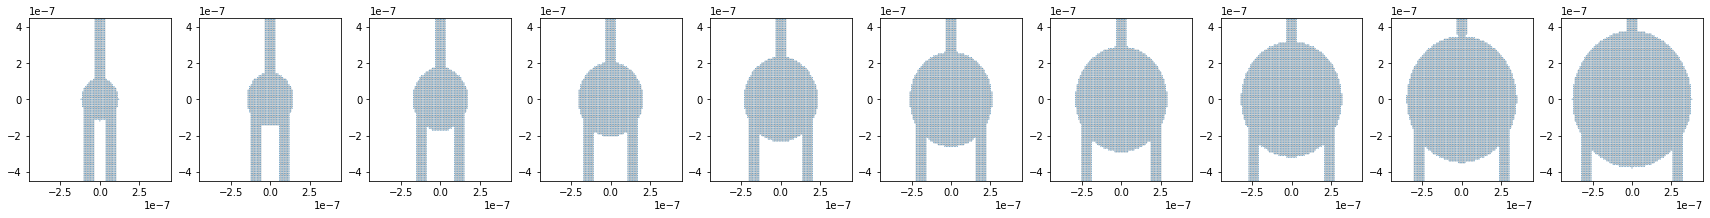

In [18]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs_circle[i][0], ax=axes)
    axes.set_ylim(-4.5e-7, 4.5e-7)
#    axes.set_title(r'$area=30\times$'+str(np.round(lengths[i]/a, 3)))
    axes.set_xlim(-4.5e-7, 4.5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

(-2.5e-07, 2.5e-07)

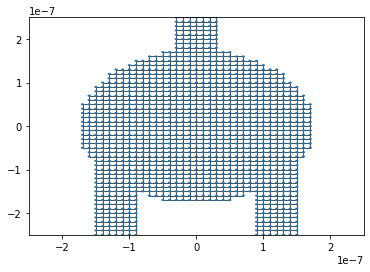

In [19]:
fig, ax = plt.subplots()
kwant.plot(tjs_circle[2][0], ax=ax)
ax.set_ylim(-2.5e-7, 2.5e-7)
ax.set_xlim(-2.5e-7, 2.5e-7)

### Calculation: all bands

In [50]:
mus_qd = np.linspace(-0.002, 0.005, 150)
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs_circle, n=n, key=key)

In [51]:
def wrap(args):
    return eigen(*args)

In [52]:
directory_path = '../data/circle_radius'
os.system('mkdir ' + directory_path)

mkdir: cannot create directory ‘../data/circle_radius’: File exists


256

In [53]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)
    
    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()
    
    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

# Half ring geometry

## Radius dependence

In [20]:
geometry = {
    "l": 130*a,
    "w": 7*a,
    "a": a,
    "side": 'up',
    "shape": 'ring',
}

In [21]:
n_geometries = 10
tj_rads = np.linspace([6*a,15*a], [41*a,50*a], n_geometries)

In [22]:
tjs = []
for r, R in tj_rads:
    geometry.update(r=r)
    geometry.update(R=R)
    trijunction, f_params, _ = tj.finite_system(**geometry)
    trijunction = trijunction.finalized()
    tjs.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

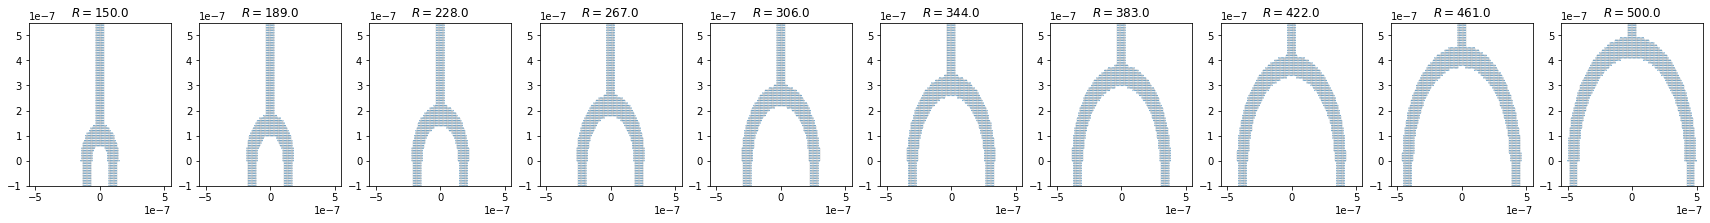

In [23]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs[i][0], ax=axes)
    axes.set_ylim(-1e-7, 5.5e-7)
    axes.set_title(r'$R=$'+str(10*np.round(tj_rads[i][1]/a, 1)))
    axes.set_xlim(-5.5e-7, 5.5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

(-3e-07, 3e-07)

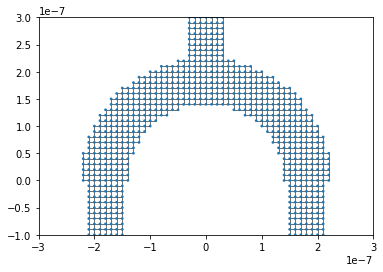

In [24]:
fig, ax = plt.subplots()
kwant.plot(tjs[2][0], ax=ax)
ax.set_ylim(-1e-7, 3e-7)
ax.set_xlim(-3e-7, 3e-7)

### Calculation: all bands

In [58]:
mus_qd = np.linspace(-0.001, 0.005, 150)
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs, n=n, key=key)

In [59]:
def wrap(args):
    return eigen(*args)

In [60]:
directory_path = '../data/ring_radius'
os.system('mkdir ' + directory_path)

mkdir: cannot create directory ‘../data/ring_radius’: File exists


256

In [61]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)

    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()

    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

## Size dependence

In [31]:
geometry = {
    "l": 130*a,
    "w": 7*a,
    "a": a,
    "side": 'up',
    "shape": 'ring',
}

In [32]:
n_geometries = 10
tj_rads = np.linspace([11*a,40*a], [31*a,40*a], n_geometries)

In [33]:
tjs = []
for r, R in tj_rads:
    geometry.update(r=r)
    geometry.update(R=R)
    trijunction, f_params, _ = tj.finite_system(**geometry)
    trijunction = trijunction.finalized()
    tjs.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

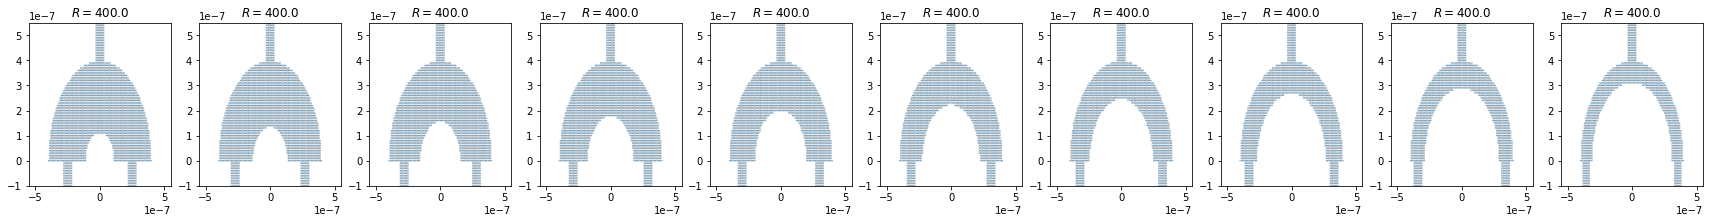

In [34]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs[i][0], ax=axes)
    axes.set_ylim(-1e-7, 5.5e-7)
    axes.set_title(r'$R=$'+str(10*np.round(tj_rads[i][1]/a, 1)))
    axes.set_xlim(-5.5e-7, 5.5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

### Calculation: all bands

In [35]:
mus_qd = np.linspace(-0.001, 0.005, 150)
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs, n=n, key=key)

In [36]:
def wrap(args):
    return eigen(*args)

In [37]:
directory_path = '../data/ring_size'
os.system('mkdir ' + directory_path)

0

In [38]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)
    
    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()
    
    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

# V geometry

## Angle dependence

In [39]:
geometry = {
"A": 800*a**2,
"l": 130*a,
"w": 7*a,
"a": a,
"w_v": 9*a,
"side": 'up',
"shape": 'v'
}

In [40]:
n_geometries = 10
angles = np.linspace(0.15, 0.45, n_geometries)

In [41]:
tjs = []
for angle in angles:
    geometry.update(angle=angle*np.pi)
    trijunction, f_params, _ = tj.finite_system(**geometry)
    trijunction = trijunction.finalized()
    tjs.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

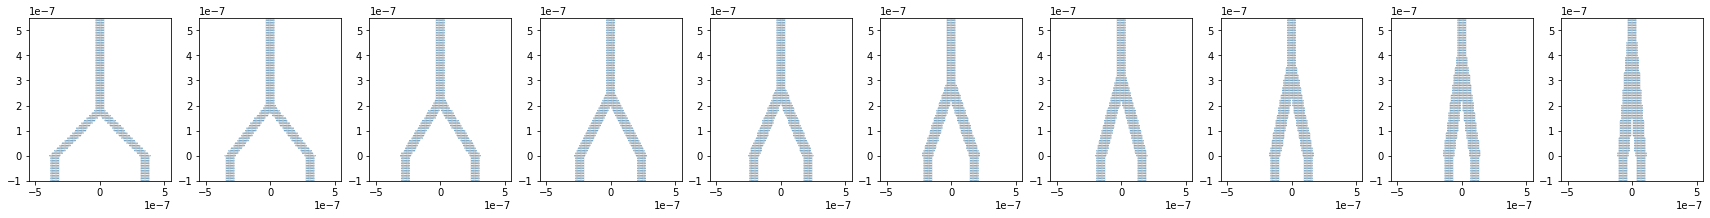

In [42]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs[i][0], ax=axes)
    axes.set_ylim(-1e-7, 5.5e-7)
    #axes.set_title(r'$R=$'+str(10*np.round(tj_rads[i][1]/a, 1)))
    axes.set_xlim(-5.5e-7, 5.5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

### Calculation: all bands

In [43]:
mus_qd = np.linspace(-0.001, 0.01, 200)
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs, n=n, key=key)

In [44]:
def wrap(args):
    return eigen(*args)

In [45]:
directory_path = '../data/v_angle'
os.system('mkdir ' + directory_path)

mkdir: cannot create directory ‘../data/v_angle’: File exists


256

In [46]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)

    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()

    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

# Triangular geometry

## Angle dependence wires both sides

In [31]:
area = 800*a**2
geometry = {
    "l": 130*a,
    "w": 7*a,
    "a": a,
    "side": 'up',
    "shape": 'triangle',
    "A": area
}

In [32]:
n_geometries = 10
angles = np.linspace(0.05, 0.35, n_geometries)

In [33]:
tjs = []
for theta in angles:
    geometry.update(angle=theta*np.pi)
    center = np.sqrt(np.abs(area/np.tan(theta*np.pi)))/2
    geometry.update(centers=[center, -center])
    trijunction, f_params, _ = tj.finite_system(**geometry)
    trijunction = trijunction.finalized()
    tjs.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

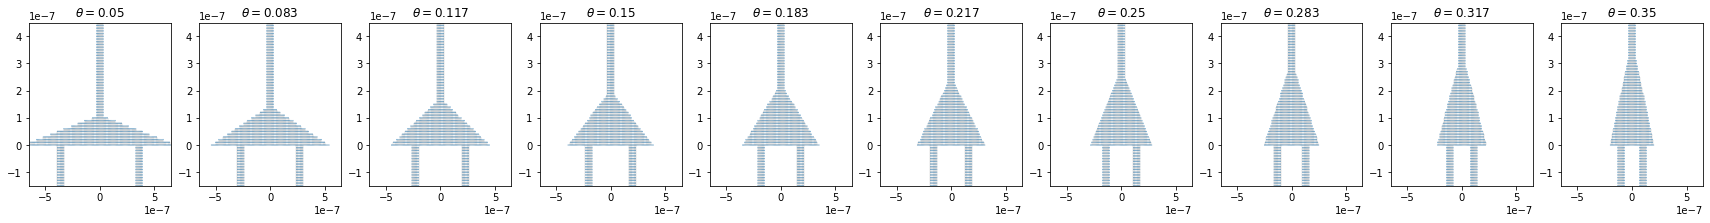

In [34]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs[i][0], ax=axes)
    axes.set_ylim(-1.5e-7, 4.5e-7)
    axes.set_xlim(-6.5e-7, 6.5e-7)
    axes.set_title(r'$\theta=$'+str(np.round(angles[i], 3)))
    #axes.set_xlim(-5e-7, 5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

(-5e-07, 5e-07)

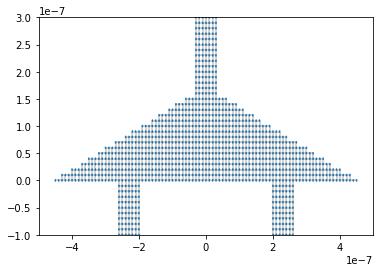

In [35]:
fig, ax = plt.subplots()
kwant.plot(tjs[2][0], ax=ax)
ax.set_ylim(-1e-7, 3e-7)
ax.set_xlim(-5e-7, 5e-7)

### Calculation: all bands

In [16]:
mus_qd = np.linspace(-0.0025, 0.005, 150)
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs, n=n, key=key)

In [17]:
def wrap(args):
    return eigen(*args)

In [18]:
directory_path = '../data/triangle_angles_two_sides/'
os.system('mkdir ' + directory_path)

mkdir: cannot create directory ‘../data/triangle_angles_two_sides/’: File exists


256

In [19]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)

    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()

    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

## Angle dependence wires one side

In [36]:
area = 800*a**2
w = 7*a
geometry = {
    "l": 130*a,
    "w": w,
    "a": a,
    "side": 'down',
    "shape": 'triangle',
    "A": area
}

In [37]:
n_geometries = 10
angles = np.linspace(0.05, 0.35, n_geometries)

In [38]:
tjs = []
for theta in angles:
    geometry.update(angle=theta*np.pi)
    center = np.sqrt(np.abs(area/np.tan(theta*np.pi)))/2
    if center < 3*w/2:
        center = 10*a
    geometry.update(centers=[center, -center])
    trijunction, f_params, _ = tj.finite_system(**geometry)
    trijunction = trijunction.finalized()
    tjs.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

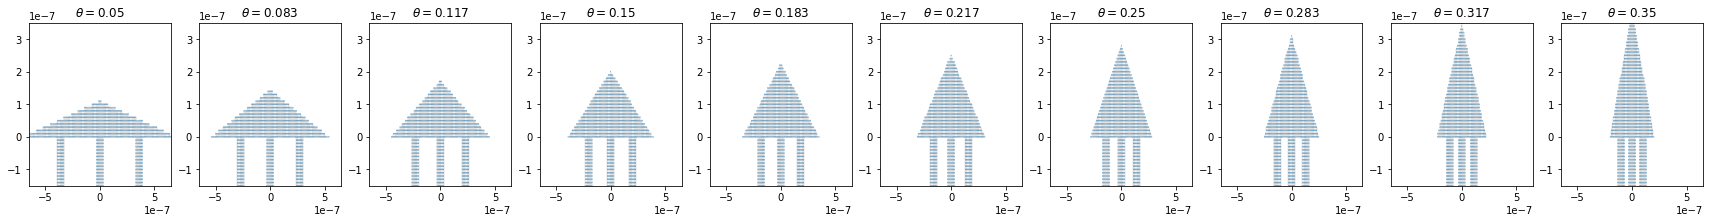

In [39]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs[i][0], ax=axes)
    axes.set_ylim(-1.5e-7, 3.5e-7)
    axes.set_xlim(-6.5e-7, 6.5e-7)
    axes.set_title(r'$\theta=$'+str(np.round(angles[i], 3)))
    #axes.set_xlim(-5e-7, 5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

(-5e-07, 5e-07)

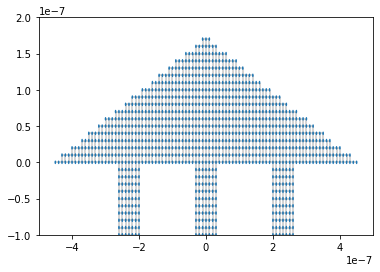

In [41]:
fig, ax = plt.subplots()
kwant.plot(tjs[2][0], ax=ax)
ax.set_ylim(-1e-7, 2e-7)
ax.set_xlim(-5e-7, 5e-7)

### Calculation: all bands

In [24]:
mus_qd = np.linspace(-0.0025, 0.005, 150)
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs, n=n, key=key)

In [25]:
def wrap(args):
    return eigen(*args)

In [26]:
directory_path = '../data/triangle_angles_one_side/'
os.system('mkdir ' + directory_path)

0

In [27]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)

    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()

    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

## Size dependence wires both sides

In [25]:
angle = np.pi*0.2
geometry = {
    "l": 130*a,
    "w": 7*a,
    "a": a,
    "side": 'down',
    "shape": 'triangle',
    "angle": angle
}

In [26]:
n_geometries = 10
areas = np.linspace(500, 2500, n_geometries)*a**2

In [27]:
tjs = []
for area in areas:
    geometry.update(A=area)
    center = np.sqrt(np.abs(area/np.tan(angle)))/2
    geometry.update(centers=[center, -center])
    trijunction, f_params, _ = tj.finite_system(**geometry)
    trijunction = trijunction.finalized()
    tjs.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

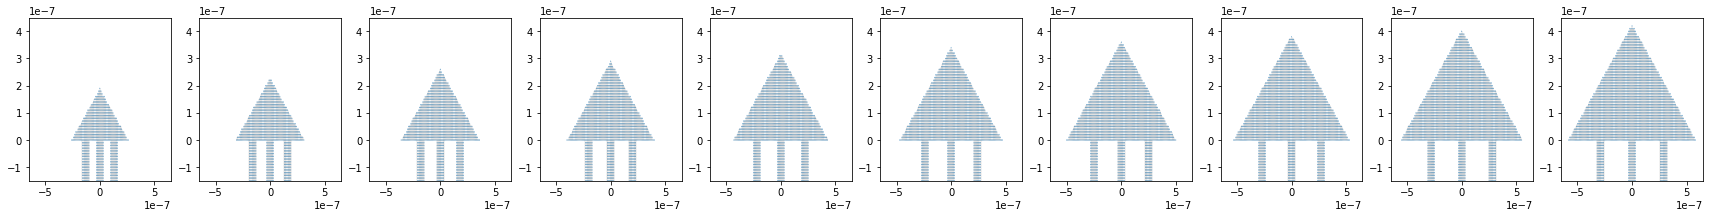

In [28]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs[i][0], ax=axes)
    axes.set_ylim(-1.5e-7, 4.5e-7)
    axes.set_xlim(-6.5e-7, 6.5e-7)
    #axes.set_title(r'$\theta=$'+str(np.round(angles[i], 3)))
    #axes.set_xlim(-5e-7, 5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

(-4e-07, 4e-07)

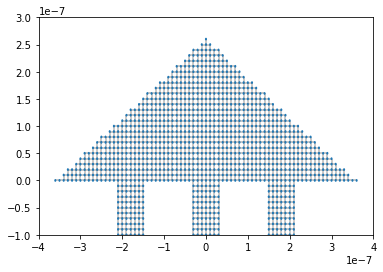

In [30]:
fig, ax = plt.subplots()
kwant.plot(tjs[2][0], ax=ax)
ax.set_ylim(-1e-7, 3e-7)
ax.set_xlim(-4e-7, 4e-7)

### Calculation: all bands

In [19]:
mus_qd = np.linspace(-0.0025, 0.005, 150)
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs, n=n, key=key)

In [20]:
def wrap(args):
    return eigen(*args)

In [21]:
directory_path = '../data/triangle_size_one_side/'
os.system('mkdir ' + directory_path)

mkdir: cannot create directory ‘../data/triangle_size_one_side/’: File exists


256

In [ ]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)

    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()

    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

# Inverted triangle

## Angle dependence wires two sides

In [42]:
area = 800*a**2
geometry = {
    "L": 130*a,
    "w": 7*a,
    "side": 'up',
    "area": area
}

In [43]:
n_geometries = 10
angles = np.linspace(0.05, 0.35, n_geometries)

In [44]:
tjs = []
for angle in angles:
    geometry.update(angle=angle*np.pi)
    trijunction, f_params = tj.inverted_triangle_junction(**geometry)
    tjs.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

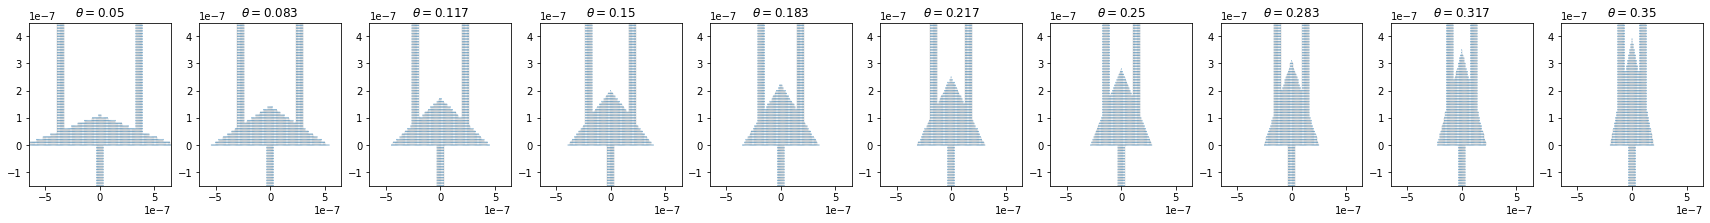

In [45]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs[i][0], ax=axes)
    axes.set_ylim(-1.5e-7, 4.5e-7)
    axes.set_xlim(-6.5e-7, 6.5e-7)
    axes.set_title(r'$\theta=$'+str(np.round(angles[i], 3)))
    #axes.set_xlim(-5e-7, 5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

(-5e-07, 5e-07)

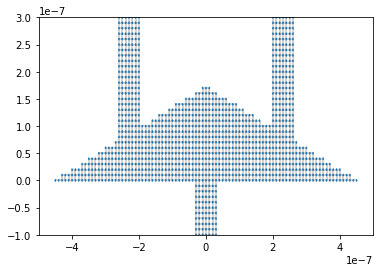

In [47]:
fig, ax = plt.subplots()
kwant.plot(tjs[2][0], ax=ax)
ax.set_ylim(-1e-7, 3e-7)
ax.set_xlim(-5e-7, 5e-7)

### Calculation: all bands

In [21]:
mus_qd = np.linspace(-0.0025, 0.005, 150)
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs, n=n, key=key)

In [22]:
def wrap(args):
    return eigen(*args)

In [23]:
directory_path = '../data/inverted_triangle_angle_two_sides/'
os.system('mkdir ' + directory_path)

0

In [24]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)

    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()

    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)

## Angle dependence wires one side

In [48]:
area = 800*a**2
geometry = {
    "L": 130*a,
    "w": 7*a,
    "side": 'down',
    "area": area
}

In [49]:
n_geometries = 10
angles = np.linspace(0.05, 0.35, n_geometries)

In [50]:
tjs = []
for angle in angles:
    geometry.update(angle=angle*np.pi)
    #center = np.sqrt(np.abs(area/np.tan(angle)))/2
    #geometry.update(centers=[center, -center])
    trijunction, f_params = tj.inverted_triangle_junction(**geometry)
    tjs.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

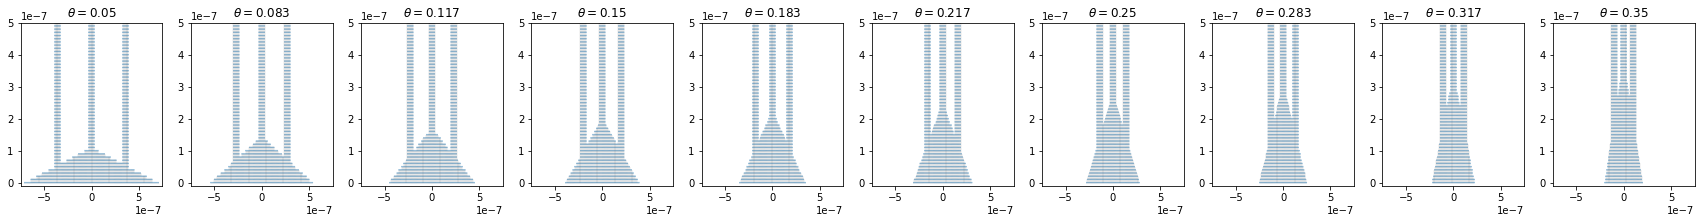

In [51]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs[i][0], ax=axes)
    axes.set_ylim(-0.1e-7, 5e-7)
    axes.set_xlim(-7.5e-7, 7.5e-7)
    axes.set_title(r'$\theta=$'+str(np.round(angles[i], 3)))
    #axes.set_xlim(-5e-7, 5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

(-5e-07, 5e-07)

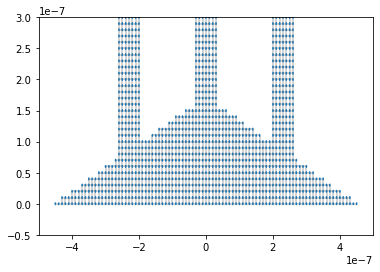

In [53]:
fig, ax = plt.subplots()
kwant.plot(tjs[2][0], ax=ax)
ax.set_ylim(-0.5e-7, 3e-7)
ax.set_xlim(-5e-7, 5e-7)

### Calculation: all bands

In [29]:
mus_qd = np.linspace(-0.0025, 0.005, 150)
key = 'mu_qd'
n = 6
eigen = tl.solver(geometries=tjs, n=n, key=key)

In [30]:
def wrap(args):
    return eigen(*args)

In [31]:
directory_path = '../data/inverted_triangle_angles_one_side/'
os.system('mkdir ' + directory_path)

0

In [32]:
for index in range(7):

    params = tl.finite_coupling_parameters(index=index)

    args = list(it.product(range(n_geometries), mus_qd, params))
    args_db = db.from_sequence(args, npartitions=20)
    result = args_db.map(wrap).compute()

    path = directory_path + '/band_'+str(index)+'th.pickle'
    with open(path, 'wb') as file:
        pickle.dump(result, file)